## Observations and Insights 

In [1]:
# Matthew Lett
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata.head())
# print(study_results.head())

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
unique_mice_count = len(pd.unique(combined_data['Mouse ID']))
print(f'There are {unique_mice_count} unique mice in the study')

There are 249 unique mice in the study


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mouse = combined_data.loc[combined_data['Mouse ID'].isin(duplicated_mice['Mouse ID'])]
bad_mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[~combined_data['Mouse ID'].isin(duplicated_mice['Mouse ID'])]
clean_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data['Mouse ID'].nunique()
print(f'There are {clean_mice_count} unique mice in the study with clean records.')

There are 248 unique mice in the study with clean records.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Generate Statistics
tumor_volume_mean = clean_data.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
tumor_volume_median = clean_data.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
tumor_volume_variance = clean_data.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
tumor_volume_standard_deviation = clean_data.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
tumor_volume_sem = clean_data.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

tumor_volumne_summary_statistics = pd.DataFrame({'Mean of Tumor Volume': tumor_volume_mean,
                                   'Median of Tumor Volume': tumor_volume_median,
                                   'Variance of Tumor Volume': tumor_volume_variance,
                                   'Standard Deviation of Tumor Volume': tumor_volume_standard_deviation, 
                                   'SEM of Tumor Volume': tumor_volume_sem
})

# Display results
tumor_volumne_summary_statistics

Mean of Tumor Volume  Median of Tumor Volume  \
Drug Regimen                                                 
Capomulin                40.675741               41.557809   
Ceftamin                 52.591172               51.776157   
Infubinol                52.884795               51.820584   
Ketapril                 55.235638               53.698743   
Naftisol                 54.331565               52.509285   
Placebo                  54.033581               52.288934   
Propriva                 52.320930               50.446266   
Ramicane                 40.216745               40.673236   
Stelasyn                 54.233149               52.431737   
Zoniferol                53.236507               51.818479   

              Variance of Tumor Volume  Standard Deviation of Tumor Volume  \
Drug Regimen                                                                 
Capomulin                    24.947764                            4.994774   
Ceftamin                     39.290177                            6.268188   
Infubinol                    43.128684                            6.567243   
Ketapril                     68.553577                            8.279709   
Naftisol                     66.173479                            8.134708   
Placebo                      61.168083                            7.821003   
Propriva                     43.852013                            6.622085   
Ramicane                     23.486704                            4.846308   
Stelasyn                     59.450562                            7.710419   
Zoniferol                    48.533355                            6.966589   

              SEM of Tumor Volume  
Drug Regimen                       
Capomulin                0.329346  
Ceftamin                 0.469821  
Infubinol                0.492236  
Ketapril                 0.603860  
Naftisol                 0.596466  
Placebo                  0.581331  
Propriva                 0.544332  
Ramicane                 0.320955  
Stelasyn                 0.573111  
Zoniferol                0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_agg = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

#Display results
tumor_volume_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

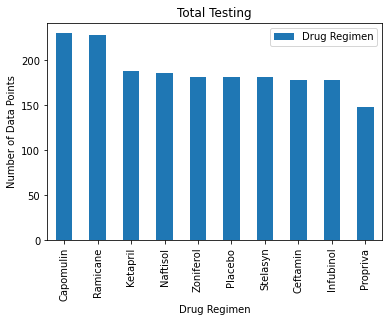

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# # these results match the notebook instructions of unique mice
# # creates a dataframe with just drug regimen and mice id
# drug_regimen_with_mouse = clean_data[['Drug Regimen', 'Mouse ID']]

# # removes duplicates to just retrieve unique drug regimen and mice
# drug_regimen_with_mouse = drug_regimen_with_mouse.drop_duplicates(['Drug Regimen', 'Mouse ID'])
# drug_counts = drug_regimen_with_mouse['Drug Regimen'].value_counts()

# # plots the results
# drug_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice on Drug Regimen', title='Total Testing')
# plt.show()



# these results match the suggested result of number of doses per drug regimen
total_drug_count_with_mice = pd.DataFrame(pd.value_counts(clean_data['Drug Regimen']))

# plot the results
total_drug_count_with_mice.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Data Points', title='Total Testing')
plt.show()

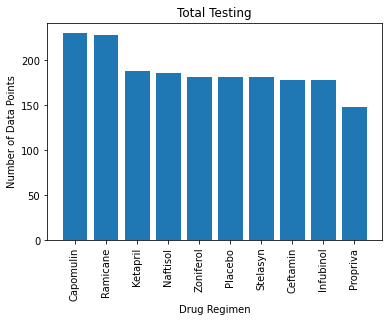

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = clean_data['Drug Regimen'].value_counts().index
y_axis = clean_data['Drug Regimen'].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.title('Total Testing')
plt.show()

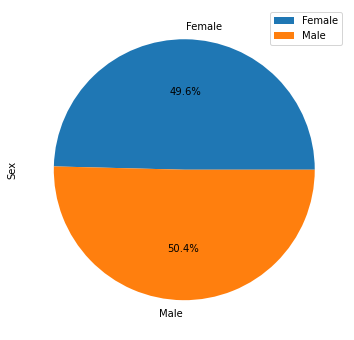

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_data.groupby(['Mouse ID', 'Sex'])
mouse_gender_df = pd.DataFrame(groupby_gender.size())
# mouse_gender_df

# plot the results in a pie chart
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Sex"]
mouse_gender.plot(kind='pie', y='Sex', autopct="%1.1f%%", figsize=(6,6))
plt.show()




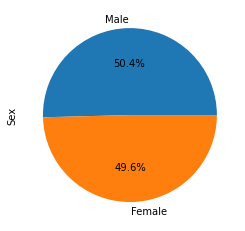

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


unique_mice = clean_data.drop_duplicates(subset='Mouse ID', keep='last')
gender_total = pd.value_counts(unique_mice['Sex']).rename_axis('Sex').reset_index(name='counts')

plt.pie(gender_total['counts'], labels=gender_total['Sex'], autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# group the data by Mouse ID and return the max timepoint
clean_data_groupby = clean_data.groupby('Mouse ID').max()['Timepoint']

# Merge the rest of the data with the 
merge_df = pd.merge(clean_data_groupby, clean_data, on=('Mouse ID', 'Timepoint'), how='left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

    # add subset  
    
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merge_df.loc[merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume.append(final_tumor)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    treatment_quartiles = final_tumor.quantile([.25,.5,.75])
    treatment_lowerq = treatment_quartiles[0.25]
    treatment_upperq = treatment_quartiles[0.75]
    treatment_iqr = treatment_upperq-treatment_lowerq

    # Determine outliers using upper and lower bounds
    treatment_lower_bound = treatment_lowerq - (1.5*treatment_iqr)
    treatment_upper_bound = treatment_upperq + (1.5*treatment_iqr)
    print(f"{treatment}: Values below {treatment_lower_bound} could be outliers.")
    print(f"{treatment}: Values above {treatment_upper_bound} could be outliers.") 

Capomulin: Values below 20.70456164999999 could be outliers.
Capomulin: Values above 51.83201549 could be outliers.
Ramicane: Values below 17.912664470000003 could be outliers.
Ramicane: Values above 54.30681135 could be outliers.
Infubinol: Values below 36.83290494999999 could be outliers.
Infubinol: Values above 82.74144559000001 could be outliers.
Ceftamin: Values below 25.355449580000002 could be outliers.
Ceftamin: Values above 87.66645829999999 could be outliers.


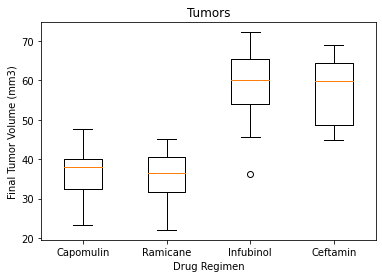

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Tumors')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.boxplot(tumor_volume, labels=treatments)
plt.show()

## Line and Scatter Plots

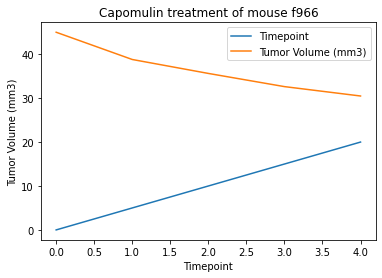

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vs_time = clean_data.loc[clean_data['Mouse ID'] == 'f966']
tumor_vs_time_data = tumor_vs_time[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

data_plot_df = tumor_vs_time_data.reset_index()
line_data = data_plot_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

line_plot = line_data.plot.line()
line_plot.set_title("Capomulin treatment of mouse f966")
line_plot.set_xlabel('Timepoint')
line_plot.set_ylabel('Tumor Volume (mm3)')
plt.show()

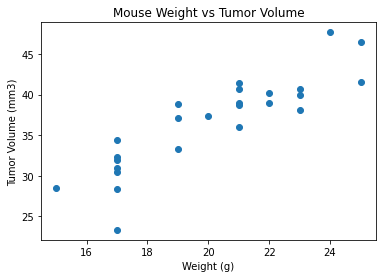

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter_data = unique_mice.loc[unique_mice['Drug Regimen'] == 'Capomulin']
mouse_weight = capomulin_scatter_data['Weight (g)']
tumor_volume = capomulin_scatter_data['Tumor Volume (mm3)']

plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(mouse_weight, tumor_volume)
plt.show()

## Correlation and Regression

The correlation between both weight and tumor volume is 0.88


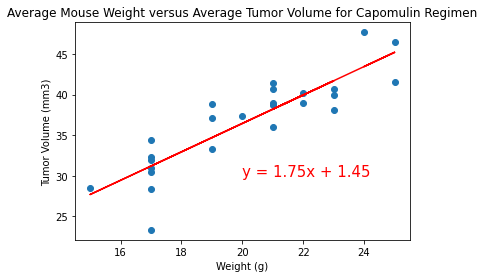

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)
regress_values = slope * mouse_weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, color="r")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()